# Poland Covid-19 Alnalysis

## Library import

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Manipulation and processing

### Load csv file

In [29]:
data = pd.read_csv('./Poland.csv')

data.drop(['Country'], axis= 1, inplace= True)
data = data.dropna()

### Get data only from 1st every month

In [30]:
data_monthly = data.loc[data['Date'].str.contains('[0-9]{4}-[0-9]{2}-01', regex= True)]
data_monthly = data_monthly.iloc[::-1]

## Data vizualization

### settings

In [31]:
sns.set(font_scale= 1.4)

### New cases

[Text(0.5, 1.0, 'New Cases')]

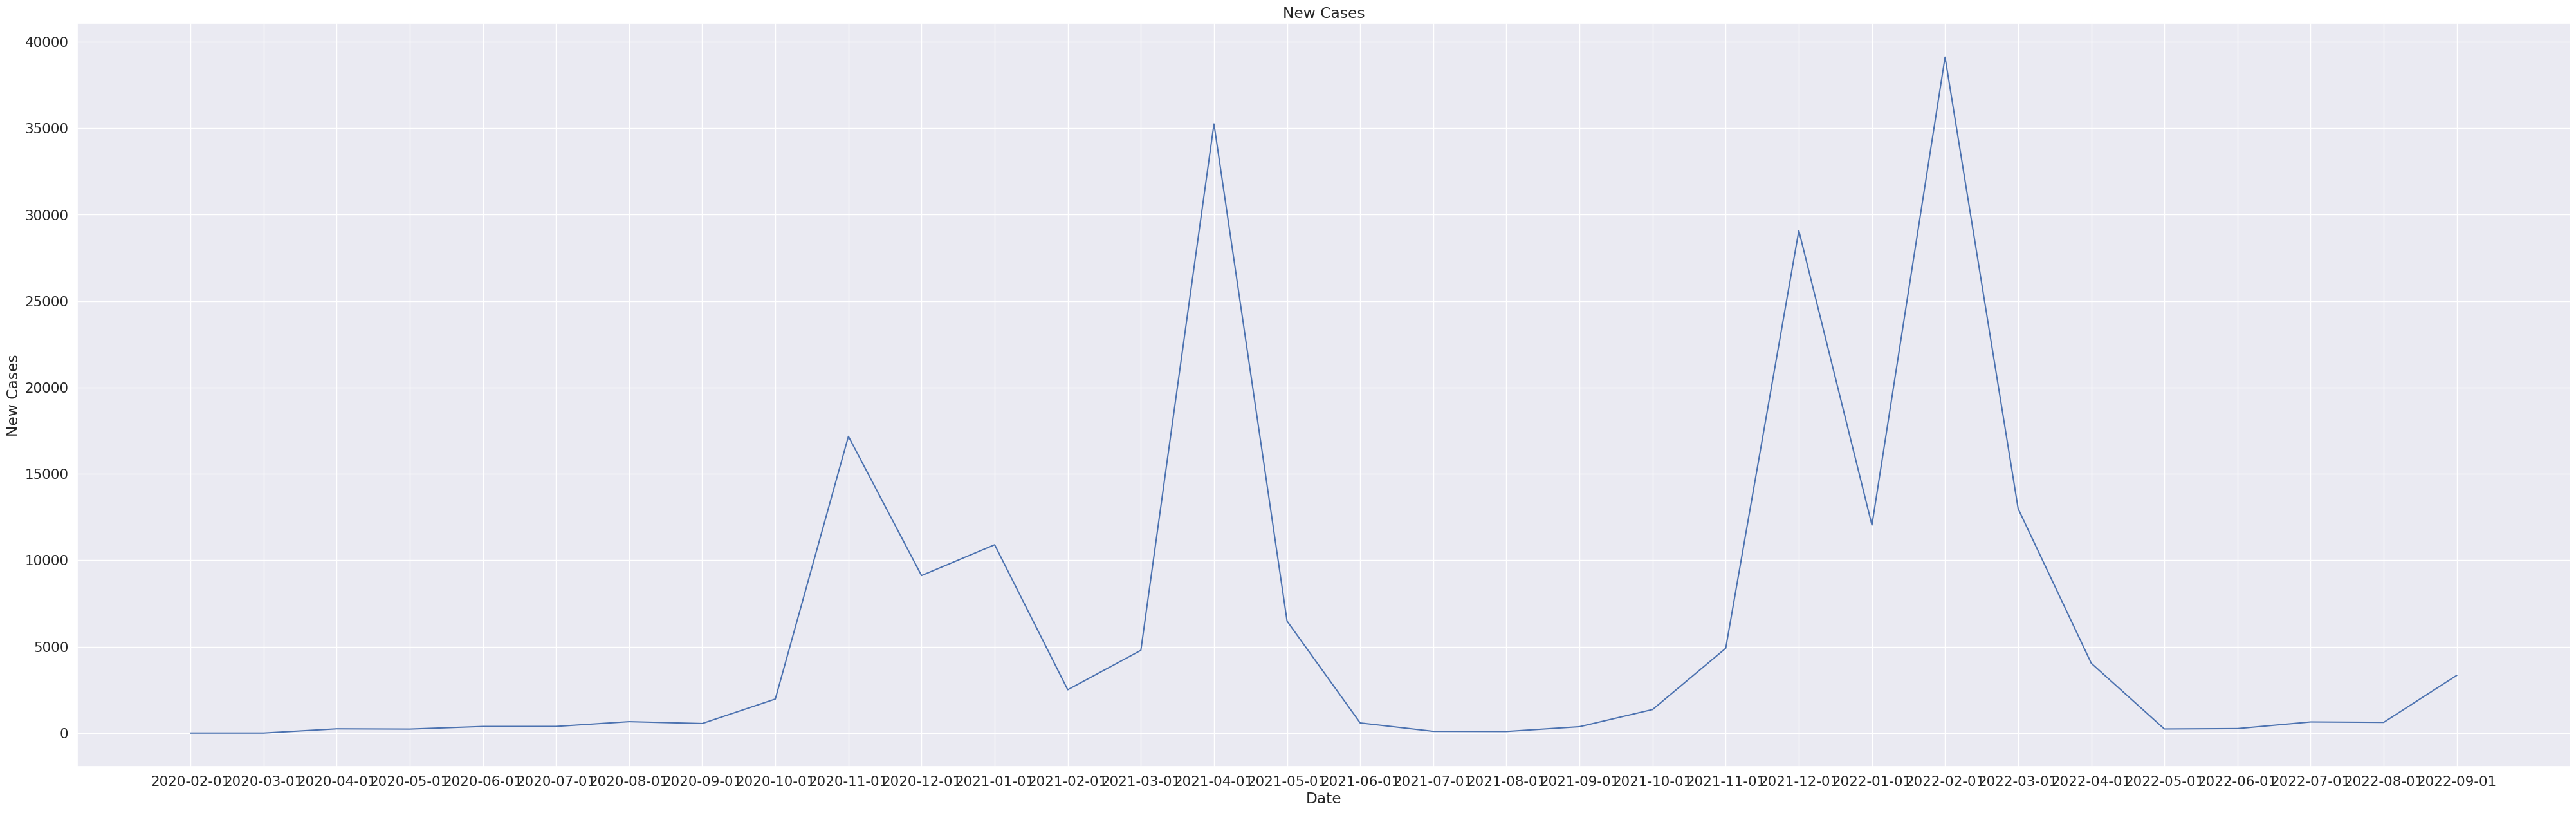

In [39]:
fig, axs = plt.subplots(ncols= 1, figsize= (50, 15))

sns.lineplot(x= 'Date', y= 'New Cases', data= data_monthly, ax= axs).set(title= 'New Cases')

What can we observe from this is that covid is most active during Fall and Winter when it starts to be cold outside and there are almost no new cases in Spring and Summer

### Deaths

[Text(0.5, 1.0, 'Deaths')]

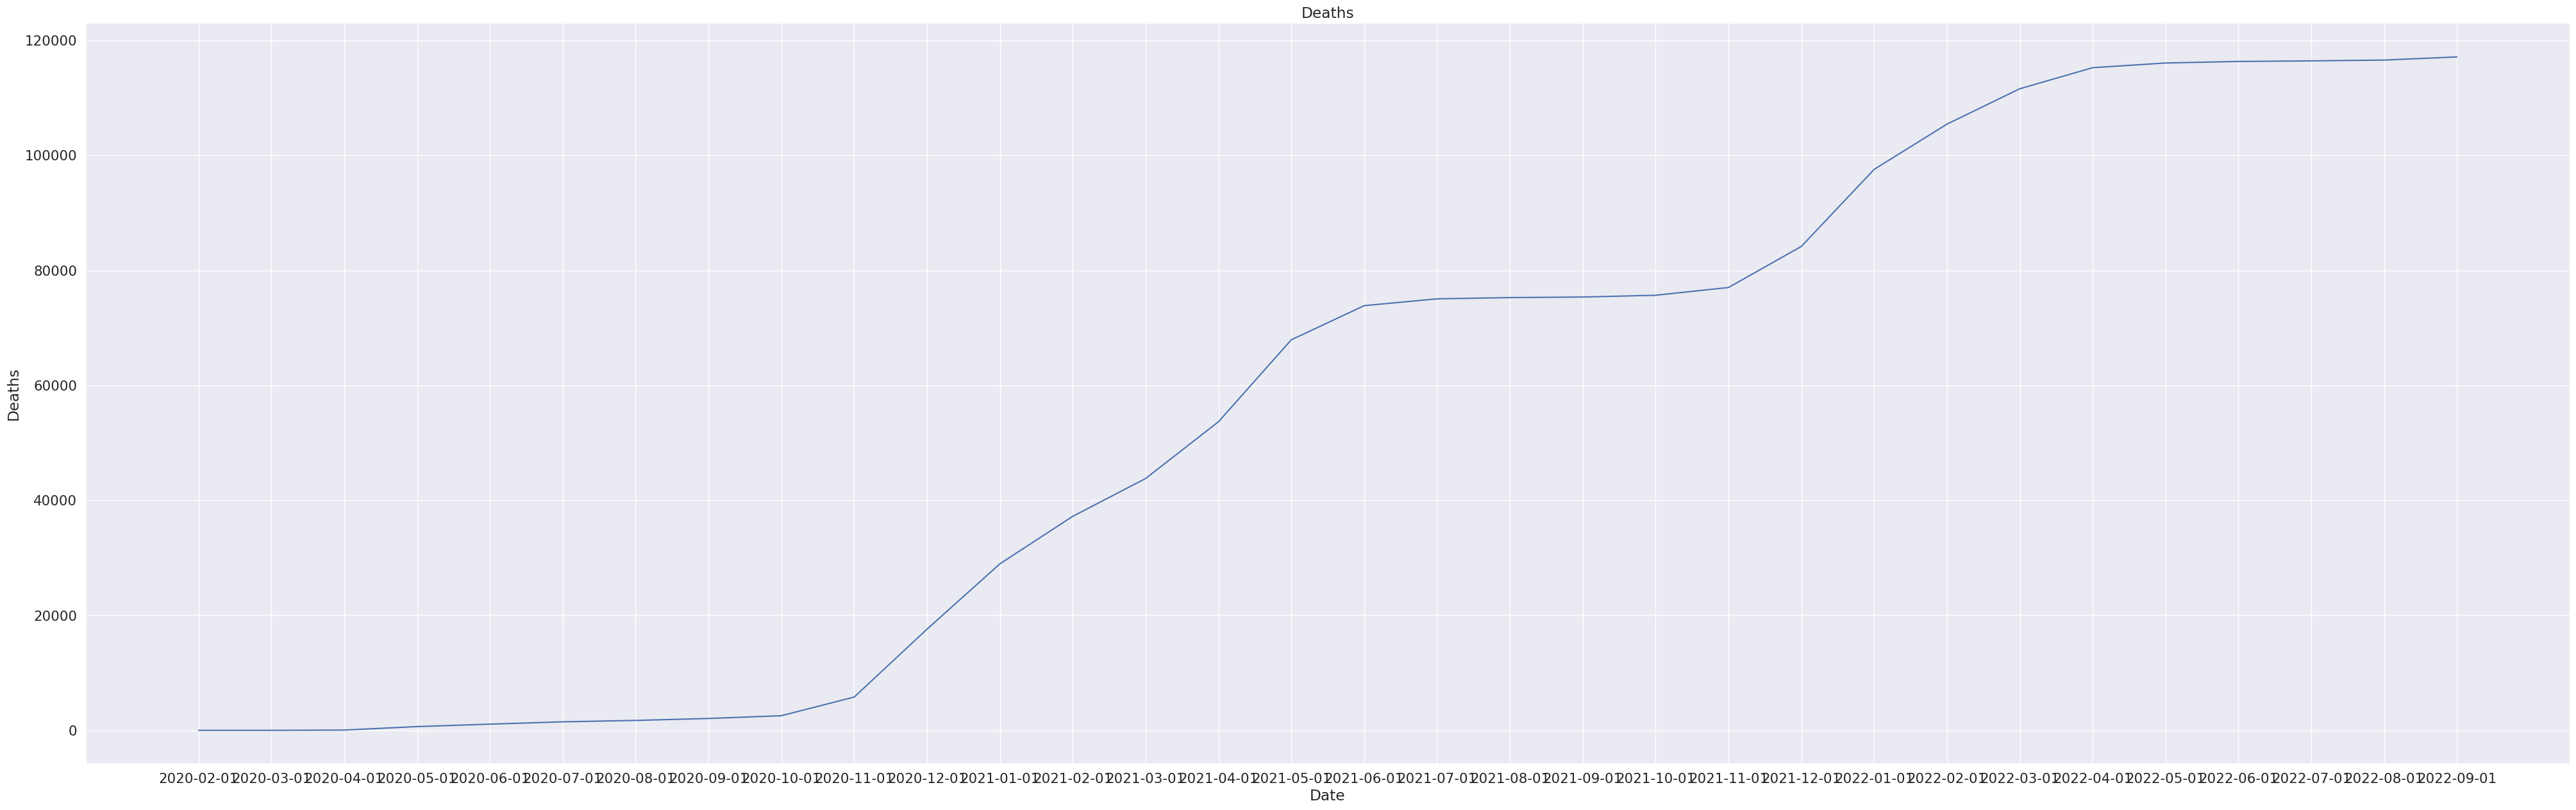

In [38]:
fig, axs = plt.subplots(ncols= 1, figsize= (50, 15))

sns.lineplot(x= 'Date', y= 'Deaths', data= data_monthly, ax= axs).set(title= 'Deaths')

### Conclusion

From this we can observe, that during the times covid is active and there are more new cases, total death cases from covid increase. However first major wave of covid activity seems more deadly compared to second one, we can see that by how much death count increses.

#### Warning
however this plots might be irrelevant becauese I didn't check average monthly values. Instead I took data from only one day from each month

## Fixing data

### Splitting Date column into Month of the year and day

In [34]:
data['Month'] = data['Date'].str[:7]
data['Day'] = data['Date'].str[8:]

data.head()

,Date,Confirmed Cases,Deaths,New Cases,Country Population,Month,Day
0,2022-09-01,6180224,117119,3339,37846611,2022-09,01
1,2022-08-31,6176885,117093,3826,37846611,2022-08,31
2,2022-08-30,6173059,117059,5300,37846611,2022-08,30
3,2022-08-29,6167759,117030,556,37846611,2022-08,29
4,2022-08-28,6167203,117030,607,37846611,2022-08,28


### Now create dataset of avg monthly for New Cases and Deaths

In [35]:
data_monthly_new_cases = data.groupby(['Month'])['New Cases'].mean().reset_index(name= 'New Cases')

data_monthly_deaths = data.groupby(['Month'])['Deaths'].mean().reset_index(name= 'Deaths')

## Visualize new datasets

[Text(0.5, 1.0, 'Deaths')]

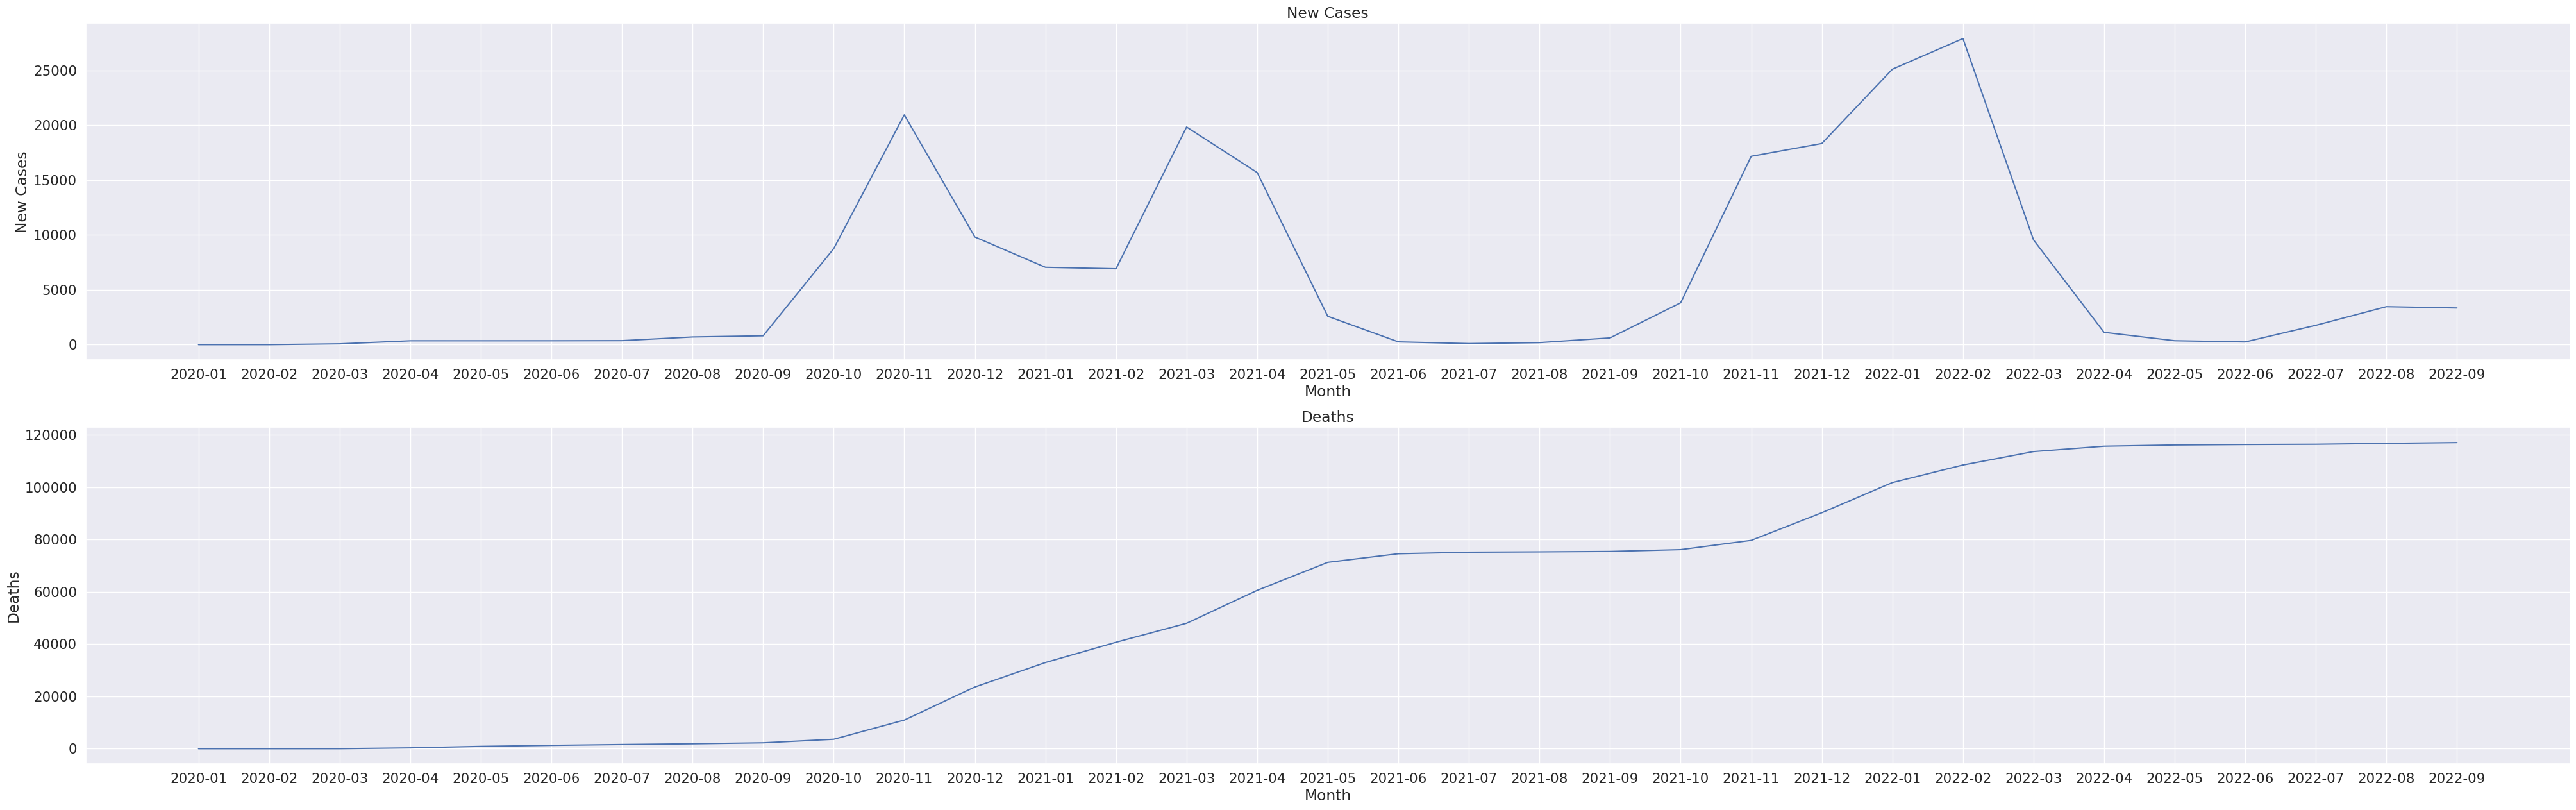

In [37]:
fig, axs = plt.subplots(nrows= 2, figsize= (50, 15))

sns.lineplot(x= 'Month', y= 'New Cases', data= data_monthly_new_cases, ax= axs[0]).set(title= 'New Cases')
sns.lineplot(x= 'Month', y= 'Deaths', data= data_monthly_deaths, ax= axs[1]).set(title= 'Deaths')

## Conclusion

As we can see plots are looking much different.

However my conclusions are the same.

Covid were more deadly during first major activity in 2020/2021 than in activity in 2021/2022.


### What was different in these two major covid activity waves
- During 1st wave : No Vaccines : Big lockdown
- During 2nd wave : Vaccines : No lockdown

Considering this two differences we can say, that No lockdown resulted in higher contaigon rate, but vaccines reduced how deadly covid is